### PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

É um conjunto de dados de dimensão muito alta, então será feita a redução de dimensionalidade

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Pré processamento

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data = scaler.transform(df)

In [12]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)

In [15]:
pca.fit(scaled_data)

PCA(n_components=2)

In [16]:
x_pca = pca.transform(scaled_data)

In [17]:
print(x_pca.shape)
print(scaled_data.shape)

(569, 2)
(569, 30)


Text(0, 0.5, 'Segunda componente')

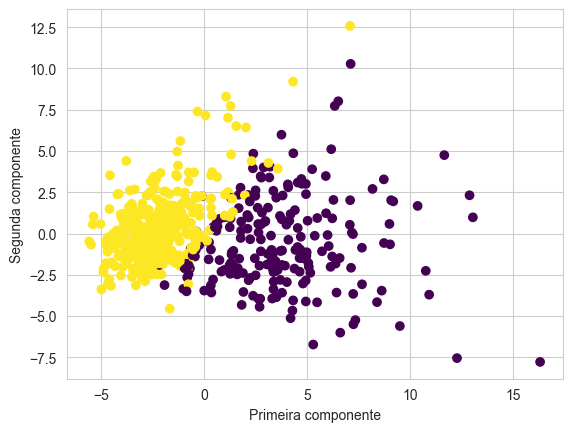

In [18]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='viridis')
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')

In [19]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [20]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

<Axes: >

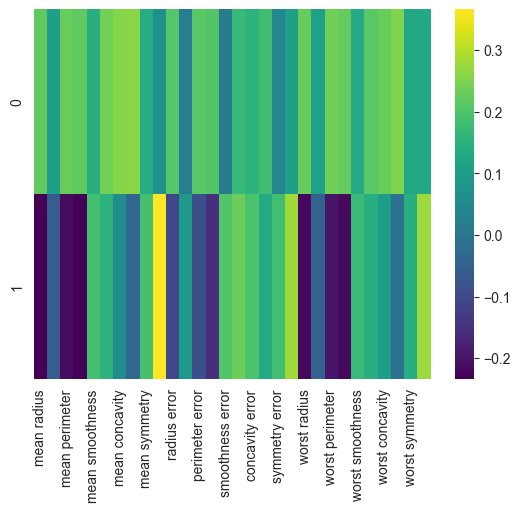

In [21]:
sns.heatmap(df_comp, cmap='viridis')

### Teste com regressao logistica

In [22]:
X = x_pca
y = cancer['target']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic = LogisticRegression()

In [27]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [28]:
pred = logistic.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 64   3]
 [  4 117]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



Text(0, 0.5, 'Segunda componente')

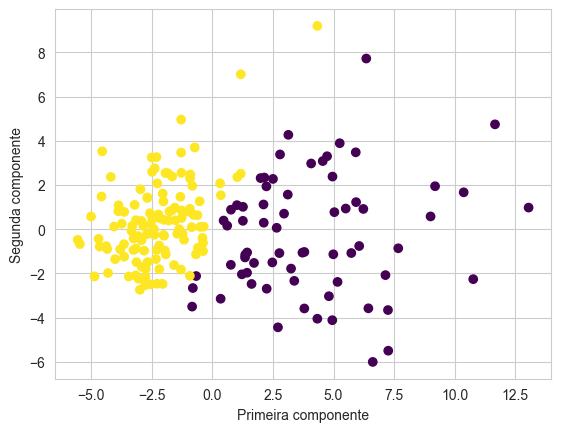

In [31]:
plt.scatter(X_test[:,0], X_test[:,1], c=pred, cmap='viridis')
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')

### Arvore de Decisao

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier()

In [34]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
pred = tree.predict(X_test)

In [36]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 58   9]
 [ 11 110]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        67
           1       0.92      0.91      0.92       121

    accuracy                           0.89       188
   macro avg       0.88      0.89      0.88       188
weighted avg       0.89      0.89      0.89       188



Text(0, 0.5, 'Segunda componente')

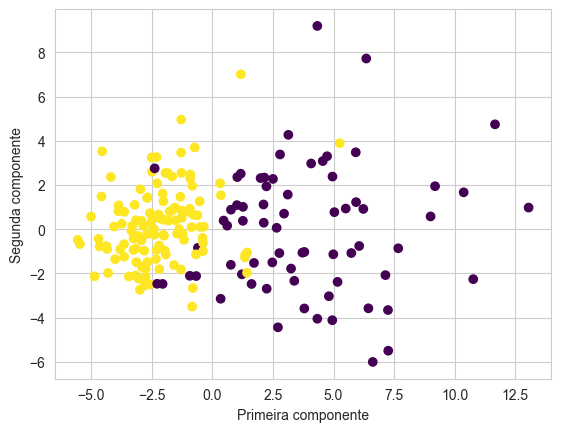

In [37]:
plt.scatter(X_test[:,0], X_test[:,1], c=pred, cmap='viridis')
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')

### SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC()

In [40]:
svc.fit(X_train, y_train)

SVC()

In [41]:
pred = svc.predict(X_test)

In [42]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 60   7]
 [  5 116]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.94      0.96      0.95       121

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



Text(0, 0.5, 'Segunda componente')

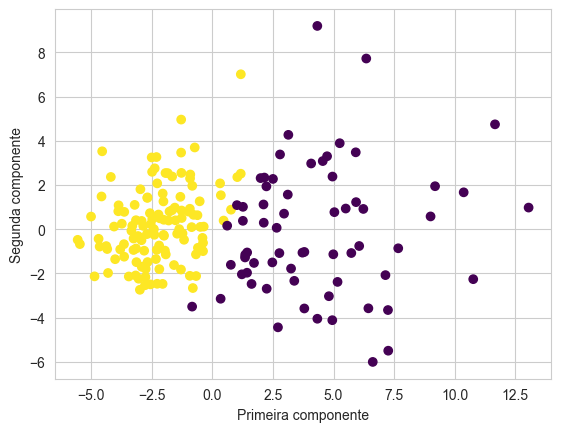

In [43]:
plt.scatter(X_test[:,0], X_test[:,1], c=pred, cmap='viridis')
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')

### Kmenas Clustering

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=2, verbose=3)

In [50]:
kmeans.fit(x_pca)

Initialization complete
Iteration 0, inertia 8021.978921097826.
Iteration 1, inertia 5869.3806221794375.
Iteration 2, inertia 5367.451366531012.
Iteration 3, inertia 5334.098502852414.
Iteration 4, inertia 5332.902607209971.
Converged at iteration 4: center shift 0.00040888622481815705 within tolerance 0.0009486481147733932.
Initialization complete
Iteration 0, inertia 8395.742700143686.
Iteration 1, inertia 5513.228512705057.
Iteration 2, inertia 5360.477976939019.
Iteration 3, inertia 5333.567629366964.
Iteration 4, inertia 5332.6837968559885.
Converged at iteration 4: center shift 0.0005604107430156535 within tolerance 0.0009486481147733932.
Initialization complete
Iteration 0, inertia 7291.997064514324.
Iteration 1, inertia 5625.580904893142.
Iteration 2, inertia 5354.21823352038.
Iteration 3, inertia 5334.472615772706.
Iteration 4, inertia 5332.555574203138.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 9116.109094957148.
Iteration 1, i

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, verbose=3)

In [51]:
pred = kmeans.labels_

In [52]:
print(confusion_matrix(cancer['target'], pred))
print(classification_report(cancer['target'], pred))

[[175  37]
 [ 16 341]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



Text(0, 0.5, 'Segunda componente')

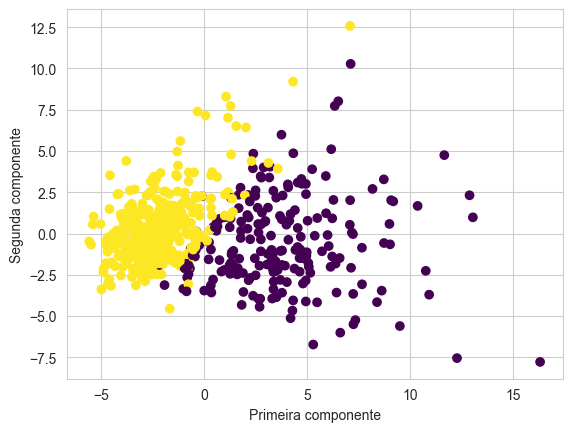

In [53]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='viridis')
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')

Text(0, 0.5, 'Segunda componente')

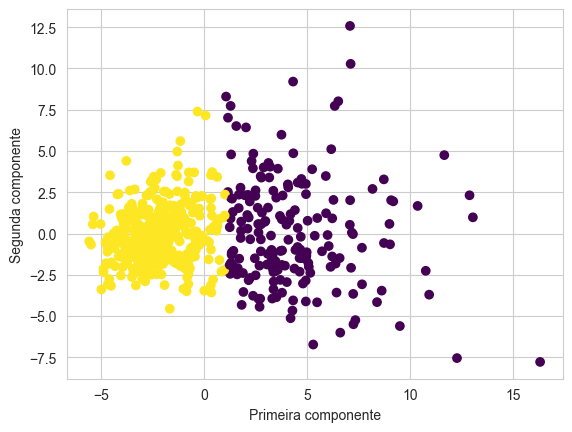

In [54]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=pred, cmap='viridis')
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')